<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D/11%EC%9B%94%2009%EC%9D%BC/11%EC%9B%94_9%EC%9D%BC_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 판다스 문제
# address 열은 도로, 시, 주, 우편번호로 구성
# Street, City, State, Zip이라는 새로운 열에 할당 + 기존 Address 열 삭제

import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/customers.csv')
data.head()
data['Street'] = data['Address'].str.split(',').str[0]
data['City'] = data['Address'].str.split(',').str[1]
data['Stae'] = data['Address'].str.split(',').str[2]
data['Zip'] = data['Address'].str.split(',').str[3]
data.drop('Address',axis=1,inplace=True)
data.head()

,Name,Street,City,Stae,Zip
0,Frank Manning,6461 Quinn Groves,East Matthew,New Hampshire,16656
1,Elizabeth Johnson,1360 Tracey Ports Apt. 419,Kyleport,Vermont,31924
2,Donald Stephens,19120 Fleming Manors,Prestonstad,Montana,23495
3,Michael Vincent III,441 Olivia Creek,Jimmymouth,Georgia,82991
4,Jasmine Zamora,4246 Chelsey Ford Apt. 310,Karamouth,Utah,76252


# 상위 10개 단어 분석(friedns101.txt)

In [ ]:
# 필요 라이브러리 불러오기
import pandas as pd
import glob
import matplotlib.pyplot as plt
import re
from functools import reduce
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

chandler : 3
new : 2
la : 2
vega : 2
customer : 2
rachel : 2
one : 1
monica : 1
get : 1
roommate : 1
pilot : 1
uncut : 1
version : 1
written : 1
marta : 1
kauffman : 1
david : 1
crane : 1
transcribed : 1
guineapig : 1
additional : 1
transcribing : 1
eric : 1
aasen : 1
note : 1
previously : 1
unseen : 1
part : 1
epi : 1
scene : 1
central : 1
perk : 1
joey : 1
phoebe : 1
kid : 1
dream : 1
ahh : 1
miss : 1
coffee : 1
ugh : 1


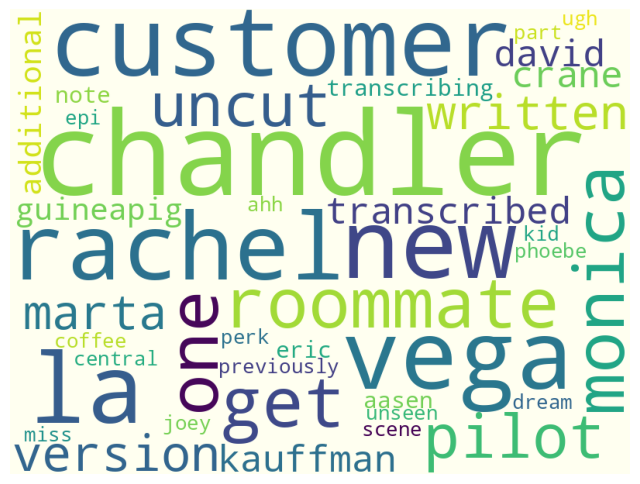

In [ ]:
text = pd.read_table('/content/drive/MyDrive/AI스쿨 파일/friends101.txt')
stopWords = set(stopwords.words('english'))
lemma = WordNetLemmatizer()
EnWords = re.sub(r"[^a-zA-Z]+", " ", str(text))  # 알파뱃으로 시작하지 않는 단어 공백으로 처리
EnWordsToken = word_tokenize(EnWords.lower())  # 소문자로 변환한 단어 토큰화
EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]  # 단어토큰이 불용어가 아닐 경우 리스트에 추가
words = [lemma.lemmatize(w) for w in EnWordsTokenStop]  #

count = Counter(words)

word_count = dict()

for tag, counts in count.most_common(40):  # 빈도수가 높은 50개의 단어
    if(len(str(tag))>1):  # 단어의 길이가 1 이상인 것만
        word_count[tag] = counts  # 딕셔너리에 저장
        print("%s : %d" % (tag, counts))

stopwords=set(STOPWORDS)
wc=WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

# 주소 데이터 분석
- 형태 다른 여러개의 csv 파일 처리(서울시, 서울특별시 등)

In [ ]:
import pandas as pd
CB = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/CoffeeBean.csv',encoding='cp949', index_col=0, header=0, engine='python')
CB.head()

,store,address,phone
0,학동역 DT점,서울시 강남구 학동로 211 1층,02-3444-9973
1,수서점,서울시 강남구 광평로 280 수서동 724호,02-3412-2326
2,차병원점,서울시 강남구 논현로 566 강남차병원1층,02-538-7615
3,강남대로점,서울시 서초구 강남대로 369 1층,02-588-5778
4,메가박스점,서울 강남구 삼성동 159 코엑스몰 지하2층,02-6002-3320


In [ ]:
addr = []
for address in CB.address:
    addr.append(str(address).split())

print(f'데이터 개수 : {len(addr)}')
addr

데이터 개수 : 243


[['서울시', '강남구', '학동로', '211', '1층'],
 ['서울시', '강남구', '광평로', '280', '수서동', '724호'],
 ['서울시', '강남구', '논현로', '566', '강남차병원1층'],
 ['서울시', '서초구', '강남대로', '369', '1층'],
 ['서울', '강남구', '삼성동', '159', '코엑스몰', '지하2층'],
 ['서울시', '강남구', '압구정로', '46길', '3'],
 ['서울시', '서초구', '서초', '1306-3호'],
 ['서울시', '강남구', '압구정로', '461', '네이처포엠빌딩B108,109호'],
 ['서울시', '강남구', '도산대로', '126'],
 ['서울시', '강남구', '논현로', '842', '압구정빌딩1층'],
 ['서울시', '강남구', '논현로', '512', '지상1,2층'],
 ['서울시', '서초구', '강남대로', '213', '24호', '지하1층'],
 ['서울시', '강남구', '삼성로', '716', 'LEE76빌딩2층'],
 ['서울', '서초구', '반포동', '736-17', 'P빌딩', '2층'],
 ['서울시', '강남구', '언주로', '30길', '10,112', '현대비젼21', '112호'],
 ['서울시', '강남구', '선릉로', '749', '1,2층'],
 ['서울시', '강남구', '테헤란로', '87길', '17', '1층'],
 ['서울시', '서초구', '서초중앙로', '118', '1층'],
 ['서울시', '강남구', '선릉로', '64길', '23', '1층'],
 ['서울시', '강남구', '도산대로49길', '13', '1층', '17,18호'],
 ['서울시', '강남구', '선릉로', '157길', '12', '석전빌딩', '1~4층'],
 ['서울시', '서초구', '강남대로', '51길', '1', '511', 'TOWER', '1층'],
 ['서울시', '강남구', '논현', '231-13

In [ ]:
addr2 = []

# addr에서 행정구역 이름 표준이 아닌 것 수정하기
for i in range(len(addr)):
    if addr[i][0] == '서울': addr[i][0] == '서울특별시'
    elif addr[i][0] == "서울시": addr[i][0]="서울특별시"
    elif addr[i][0] == "부산시": addr[i][0]="부산광역시"
    elif addr[i][0] == "인천": addr[i][0]="인천광역시"
    elif addr[i][0] == "광주": addr[i][0]="광주광역시"
    elif addr[i][0] == "대전시": addr[i][0]="대전광역시"
    elif addr[i][0] == "울산시": addr[i][0]="울산광역시"
    elif addr[i][0] == "세종시": addr[i][0]="세종특별자치시"
    elif addr[i][0] == "경기": addr[i][0]="경기도"
    elif addr[i][0] == "충북": addr[i][0]="충청북도"
    elif addr[i][0] == "충남": addr[i][0]="충청남도"
    elif addr[i][0] == "전북": addr[i][0]="전라북도"
    elif addr[i][0] == "전남": addr[i][0]="전라남도"
    elif addr[i][0] == "경북": addr[i][0]="경상북도"
    elif addr[i][0] == "경남": addr[i][0]="경상남도"
    elif addr[i][0] == "제주": addr[i][0]="제주특별자치도"
    elif addr[i][0] == "제주도": addr[i][0]="제주특별자치도"
    elif addr[i][0] == "제주시": addr[i][0]="제주특별자치도"

    addr2.append(' '.join(addr[i]))

addr2

['서울특별시 강남구 학동로 211 1층',
 '서울특별시 강남구 광평로 280 수서동 724호',
 '서울특별시 강남구 논현로 566 강남차병원1층',
 '서울특별시 서초구 강남대로 369 1층',
 '서울 강남구 삼성동 159 코엑스몰 지하2층',
 '서울특별시 강남구 압구정로 46길 3',
 '서울특별시 서초구 서초 1306-3호',
 '서울특별시 강남구 압구정로 461 네이처포엠빌딩B108,109호',
 '서울특별시 강남구 도산대로 126',
 '서울특별시 강남구 논현로 842 압구정빌딩1층',
 '서울특별시 강남구 논현로 512 지상1,2층',
 '서울특별시 서초구 강남대로 213 24호 지하1층',
 '서울특별시 강남구 삼성로 716 LEE76빌딩2층',
 '서울 서초구 반포동 736-17 P빌딩 2층',
 '서울특별시 강남구 언주로 30길 10,112 현대비젼21 112호',
 '서울특별시 강남구 선릉로 749 1,2층',
 '서울특별시 강남구 테헤란로 87길 17 1층',
 '서울특별시 서초구 서초중앙로 118 1층',
 '서울특별시 강남구 선릉로 64길 23 1층',
 '서울특별시 강남구 도산대로49길 13 1층 17,18호',
 '서울특별시 강남구 선릉로 157길 12 석전빌딩 1~4층',
 '서울특별시 서초구 강남대로 51길 1 511 TOWER 1층',
 '서울특별시 강남구 논현 231-13호 팍스타워지하1층',
 '서울 강남구 영동대로 513 컨벤션별관A동 지하 2층',
 '서울특별시 강남구 영동대로 511 트레이드타워 지하1층',
 '서울특별시 강남구 영동대로 607 12번지 1,2층',
 '서울특별시 강남구 삼성로 85길 11 롯데캐슬아파트생활편익시설동',
 '서울특별시 서초구 신반포로 23 1141호 엘루체백화점내1층1013~1015호',
 '서울특별시 송파구 석촌호수로 118 1층',
 '서울특별시 서초구 서초동 1685-8호 101~2호,113~4호,121호',
 '서울특별시 강남구 논현로 717 1층',
 '서울특별시 서초구 

In [ ]:
addr2 = pd.DataFrame(addr2, columns=['address2'])
addr2

,address2
0,서울특별시 강남구 학동로 211 1층
1,서울특별시 강남구 광평로 280 수서동 724호
2,서울특별시 강남구 논현로 566 강남차병원1층
3,서울특별시 서초구 강남대로 369 1층
4,서울 강남구 삼성동 159 코엑스몰 지하2층
...,...
238,인천광역시 중구 운서동 2868 인천공항 제2터미널 1층 연번(23-124)
239,"부산광역시 부산진구 서전로 12, 1층"
240,경기도 성남시 분당구 야탑로64 DS타워 1층
241,서울특별시 용산구 한강대로95


In [ ]:
CB2 = pd.concat([CB, addr2], axis=1)  # 옆(가로)(으)로 합치기 의미
CB2.head()

,store,address,phone,address2
0,학동역 DT점,서울시 강남구 학동로 211 1층,02-3444-9973,서울특별시 강남구 학동로 211 1층
1,수서점,서울시 강남구 광평로 280 수서동 724호,02-3412-2326,서울특별시 강남구 광평로 280 수서동 724호
2,차병원점,서울시 강남구 논현로 566 강남차병원1층,02-538-7615,서울특별시 강남구 논현로 566 강남차병원1층
3,강남대로점,서울시 서초구 강남대로 369 1층,02-588-5778,서울특별시 서초구 강남대로 369 1층
4,메가박스점,서울 강남구 삼성동 159 코엑스몰 지하2층,02-6002-3320,서울 강남구 삼성동 159 코엑스몰 지하2층


In [ ]:
# 새로운 csv 파일로 생성
CB2.to_csv('/content/drive/MyDrive/AI스쿨 파일/CoffeeBean_3.csv', encoding='cp949', index=False)

In [ ]:
# 지도에 표시
import folium
map_osm = folium.Map(location=[37.560284, 126.975334], zoom_Start=16)
map_osm.save('/content/drive/MyDrive/AI스쿨 파일/map.html')

CB_file = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/CoffeeBean_3.csv', encoding='cp949', engine='python')
CB_file.head()

,store,address,phone,address2
0,학동역 DT점,서울시 강남구 학동로 211 1층,02-3444-9973,서울특별시 강남구 학동로 211 1층
1,수서점,서울시 강남구 광평로 280 수서동 724호,02-3412-2326,서울특별시 강남구 광평로 280 수서동 724호
2,차병원점,서울시 강남구 논현로 566 강남차병원1층,02-538-7615,서울특별시 강남구 논현로 566 강남차병원1층
3,강남대로점,서울시 서초구 강남대로 369 1층,02-588-5778,서울특별시 서초구 강남대로 369 1층
4,메가박스점,서울 강남구 삼성동 159 코엑스몰 지하2층,02-6002-3320,서울 강남구 삼성동 159 코엑스몰 지하2층


In [ ]:
CB_geoData = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/CB_geo_sph_2.csv', encoding='utf8', engine='python')
len(CB_geoData)

243

In [ ]:
map_CB = folium.Map(location=[37.560284, 126.975334],zoom_start = 15)
for i, store in CB_geoData.iterrows():
    folium.Marker(location=[store['_Y'], store['_X']], popup=store['store'], icon=folium.Icon(color='red',icon='star')).add_to(map_CB)

map_CB.save('/content/drive/MyDrive/AI스쿨 파일/map_CB.html')

In [ ]:
import webbrowser
webbrowser.open('/content/drive/MyDrive/AI스쿨 파일/map_CB.html')

False